# Chocolate Sales Revenue Prediction

## Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [46]:
df = pd.read_csv('D:/DS Bootcamp/Machine Learning/machine learning projects/Machine-Learning-Projects/Predicting Chocolate Sales Revenue/Chocolate Sales.csv')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [47]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


--------

## Data Summary

We have 6 columns in our dataset:
- 'Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped'

=========================================================================

- Total no of unique values Sales Person: 25
- Total no of unique values Country: 6
- Total no of unique values Product: 22
- Total no of unique values Date: 168
- Total no of unique values Amount: 827
- Total no of unique values Boxes Shipped: 385
- Total no of unique values Year: 1
- Total no of unique values Month: 8
- Total no of unique values Day: 31

=========================================================================

- Sales Person:['Jehu Rudeforth' 'Van Tuxwell' 'Gigi Bohling' 'Jan Morforth' 'Oby Sorrel'
 'Gunar Cockshoot' 'Brien Boise' 'Rafaelita Blaksland' 'Barr Faughny'
 'Mallorie Waber' 'Karlen McCaffrey' "Marney O'Breen" 'Beverie Moffet'
 'Roddy Speechley' 'Curtice Advani' 'Husein Augar' 'Kaine Padly'
 'Dennison Crosswaite' "Wilone O'Kielt" 'Andria Kimpton' 'Kelci Walkden'
 'Camilla Castle' 'Madelene Upcott' 'Dotty Strutley' 'Ches Bonnell']

- Country:['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']

- Product:['Mint Chip Choco' '85% Dark Bars' 'Peanut Butter Cubes'
 'Smooth Sliky Salty' '99% Dark & Pure' 'After Nines' '50% Dark Bites'
 'Orange Choco' 'Eclairs' 'Drinking Coco' 'Organic Choco Syrup'
 'Milk Bars' 'Spicy Special Slims' 'Fruit & Nut Bars' 'White Choc'
 'Manuka Honey Choco' 'Almond Choco' 'Raspberry Choco'
 'Choco Coated Almonds' "Baker's Choco Chips" 'Caramel Stuffed Bars'
 '70% Dark Bites']

----------

## Data Anomilies Handling

**Remove `$` and `,` from amount column and change the data type to int** 

In [48]:
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(int)

In [49]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

---------

## Handling Missing Values

In [50]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

**No missing values**

----------

## Handling Duplicates

In [51]:
df.duplicated().sum()

0

**No duplicates**

---------

## Handling Outliers

In [52]:
num = ['Amount', 'Boxes Shipped']

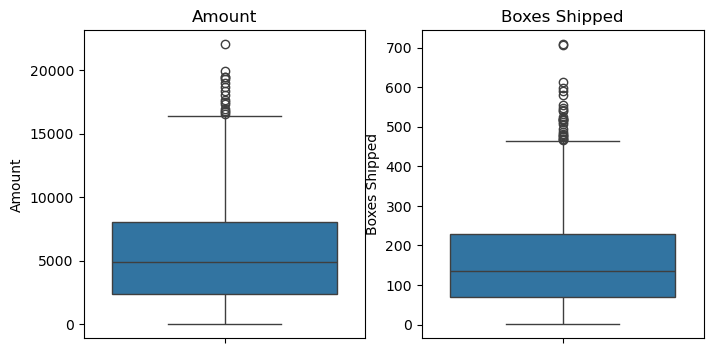

In [53]:
plt.figure(figsize=(8, 4))

for i, col in enumerate(num):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

**These are not outliers**

----------

## Exploratory Data Analysis

### Univariate Analysis

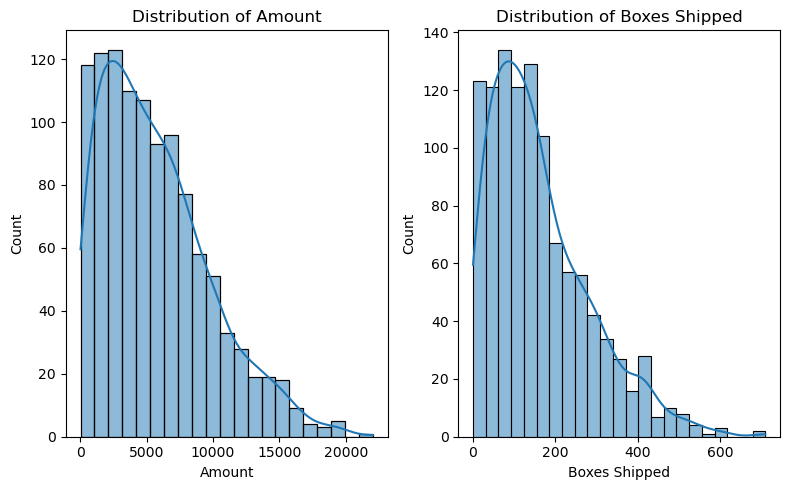

In [54]:
plt.figure(figsize=(8, 5))
for i, col in enumerate(num):
    plt.subplot(1, len(num), i + 1)
    sns.histplot(data=df, x=col, kde=True, palette='viridis')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  
plt.show()

**Both have right skewed distribution**

In [55]:
cat = ['Sales Person', 'Country', 'Product']

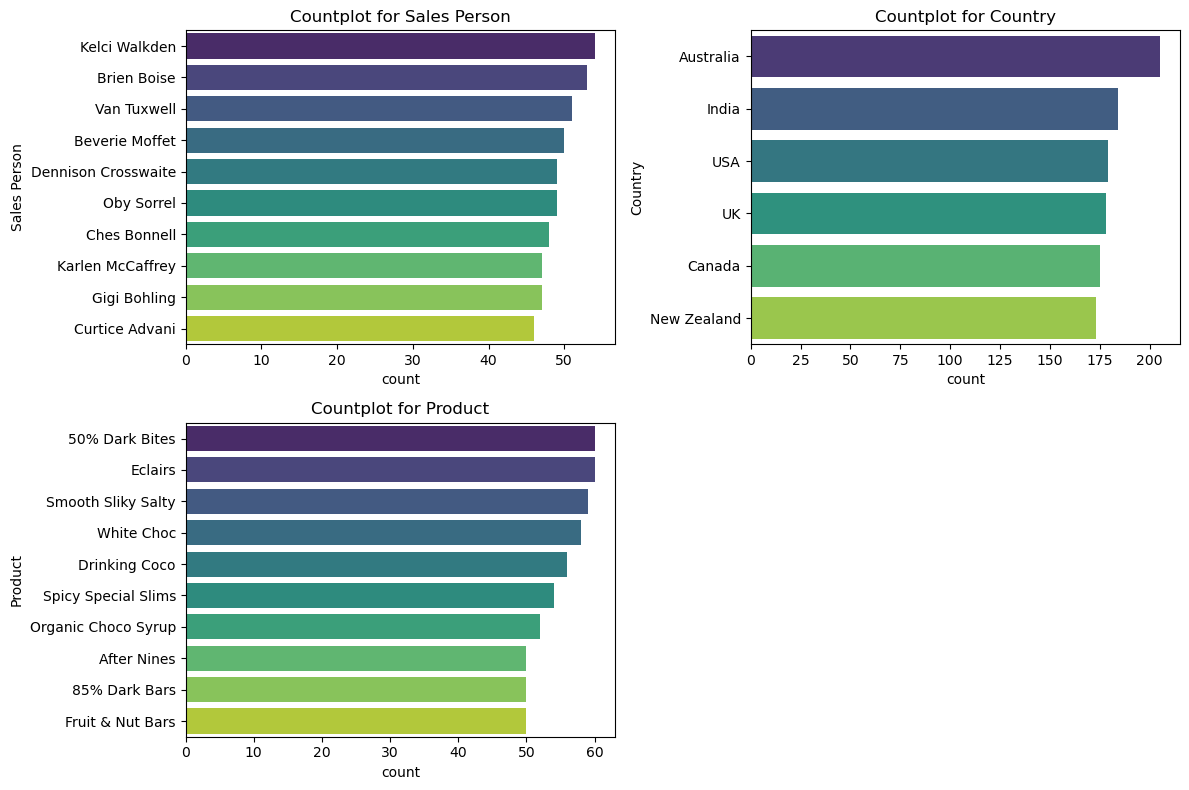

In [56]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat):
    plt.subplot(2, 2, i + 1)

    top_10 = df[col].value_counts().head(10)
    sns.countplot(y=col, data=df[df[col].isin(top_10.index)], order=top_10.index, palette='viridis')
    plt.title(f'Countplot for {col}')
    
plt.tight_layout()
plt.show()

- Kelci Walkden to Dennison Crosswaite these are the top 5 Sales Person
- Australia, India leading the most delivery 
- 50% Dark Bites, Eclairs, Silky Salty, White Choco these products are most sold

---------

### Univariate Analysis

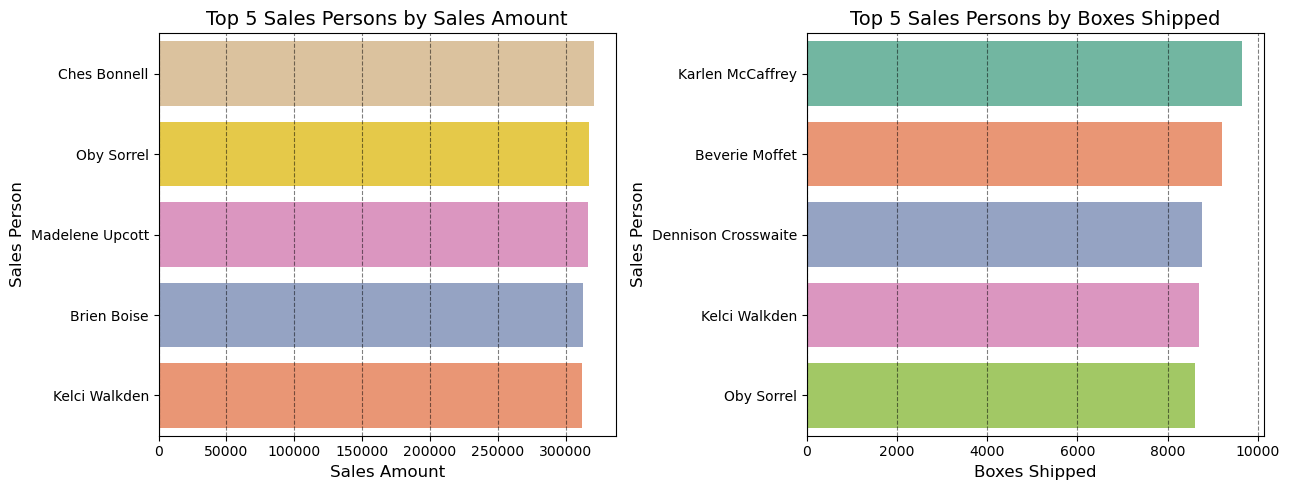

In [82]:
sale_by_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(5).reset_index()
salesperson_boxship = df.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False).head(5).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(13, 5)) 

sns.barplot(y='Sales Person', x='Amount', data=sale_by_person,
            orient='h', palette='Set2_r', ax=axs[0])
axs[0].set_title('Top 5 Sales Persons by Sales Amount', fontsize=14)
axs[0].set_xlabel('Sales Amount', fontsize=12)
axs[0].set_ylabel('Sales Person', fontsize=12)
axs[0].grid(axis='x', linestyle='--', color='black', alpha=0.5)

sns.barplot(y='Sales Person', x='Boxes Shipped', data=salesperson_boxship,
            palette='Set2', ax=axs[1])
axs[1].set_title('Top 5 Sales Persons by Boxes Shipped', fontsize=14)
axs[1].set_xlabel('Boxes Shipped', fontsize=12)
axs[1].set_ylabel('Sales Person', fontsize=12)
axs[1].grid(axis='x', linestyle='--', color='black', alpha=0.5)

plt.tight_layout()
plt.show()

- **Ches Bonnell, Oby Sorrel, Madelene Upcott, Brien Boise, Kelci Walkden these top 5 Sales Person generated the top revenue**
- **Karlen MacCaffrey, Beverie Moffet, Dennison Crosswaite, Kelci Walkden, and Oby Sorrel lead in shipping performance, handling the highest number of boxes among all sales staff**

--------

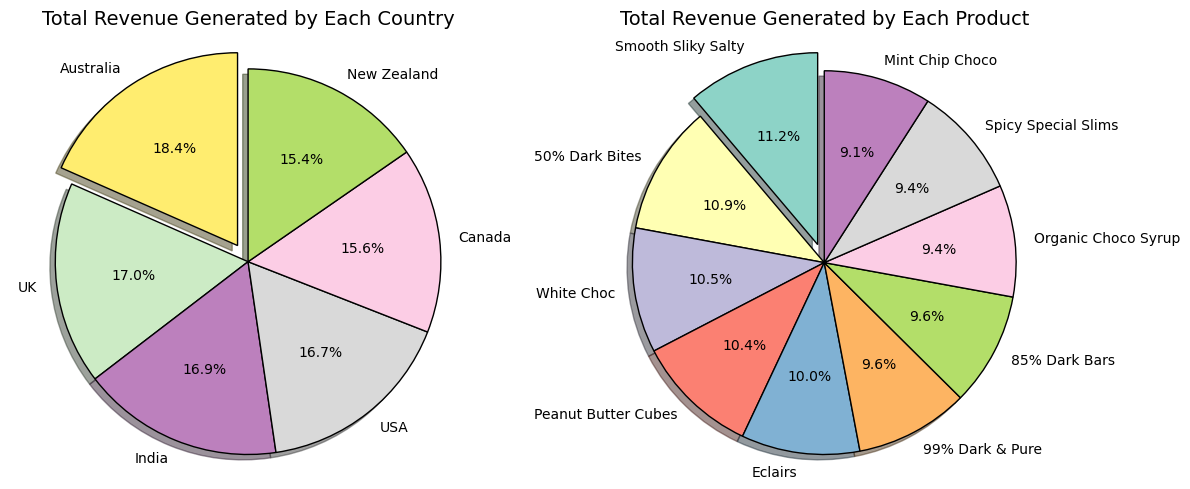

In [80]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
product_amount = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)

explode1 = [0.1 if i == 0 else 0 for i in range(len(country_revenue))]
explode2 = [0.1 if i == 0 else 0 for i in range(len(product_amount))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie(x=country_revenue, labels=country_revenue.index, autopct='%1.1f%%',
        colors=plt.cm.Set3_r.colors, explode=explode1, shadow=True, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
ax1.set_title('Total Revenue Generated by Each Country', fontsize=14)
ax1.axis('equal')

ax2.pie(x=product_amount, labels=product_amount.index, autopct='%1.1f%%',
        colors=plt.cm.Set3.colors, explode=explode2, shadow=True, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
ax2.set_title('Total Revenue Generated by Each Product', fontsize=14)
ax2.axis('equal')

plt.tight_layout()
plt.show()

- **Australia is the top-performing market, generating 18.4% of total revenue, closely followed by the UK at 17%**
- **Among products, "Smooth Silky Salty" emerged as the highest revenue contributor with an 11.2% share**

---------

**Boxes Shipped by Product**

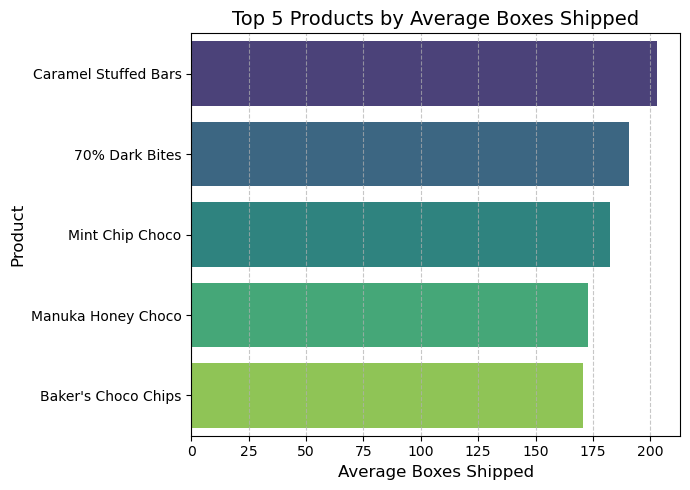

In [77]:
boxship_by_product = df.groupby('Product')['Boxes Shipped'].mean().sort_values(ascending=False).reset_index().head(5)

plt.figure(figsize=(7, 5))
sns.barplot(y='Product', x='Boxes Shipped', data=boxship_by_product, palette='viridis')

plt.title('Top 5 Products by Average Boxes Shipped', fontsize=14)
plt.xlabel('Average Boxes Shipped', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**The products Caramel Stuffed Bars, 70% Dark Bites, and Mint Chip Choco show a high shipping demand, each averaging over 175 boxes shipped per order**

--------

In [73]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_Name'] = df['Date'].dt.day_name()

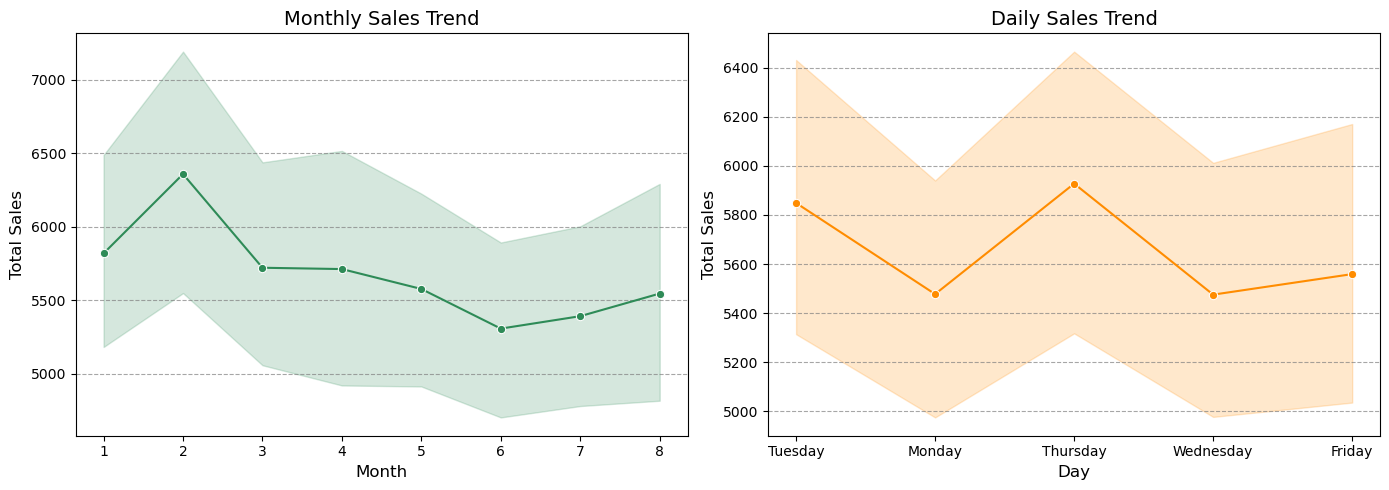

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(x='Month', y='Amount', data=df, 
             ax=axs[0], color='seagreen', marker='o')
axs[0].set_title('Monthly Sales Trend', fontsize=14)
axs[0].set_xlabel('Month', fontsize=12)
axs[0].set_ylabel('Total Sales', fontsize=12)
axs[0].grid(axis='y', linestyle='--', color='gray', alpha=0.7)

sns.lineplot(x='Day_Name', y='Amount', data=df, 
             ax=axs[1], color='darkorange', marker='o')
axs[1].set_title('Daily Sales Trend', fontsize=14)
axs[1].set_xlabel('Day', fontsize=12)
axs[1].set_ylabel('Total Sales', fontsize=12)
axs[1].grid(axis='y', linestyle='--', color='gray', alpha=0.7)

plt.tight_layout()
plt.show()

- **Sales in January and February are notably higher than in the following months, with a decreasing trend observed**
- **Sales are highest on Tuesdays and Thursdays, while other days show relatively lower sales**
- **Saturdays and Sundays appear to be off days**

---------

### Multivariate Analysis

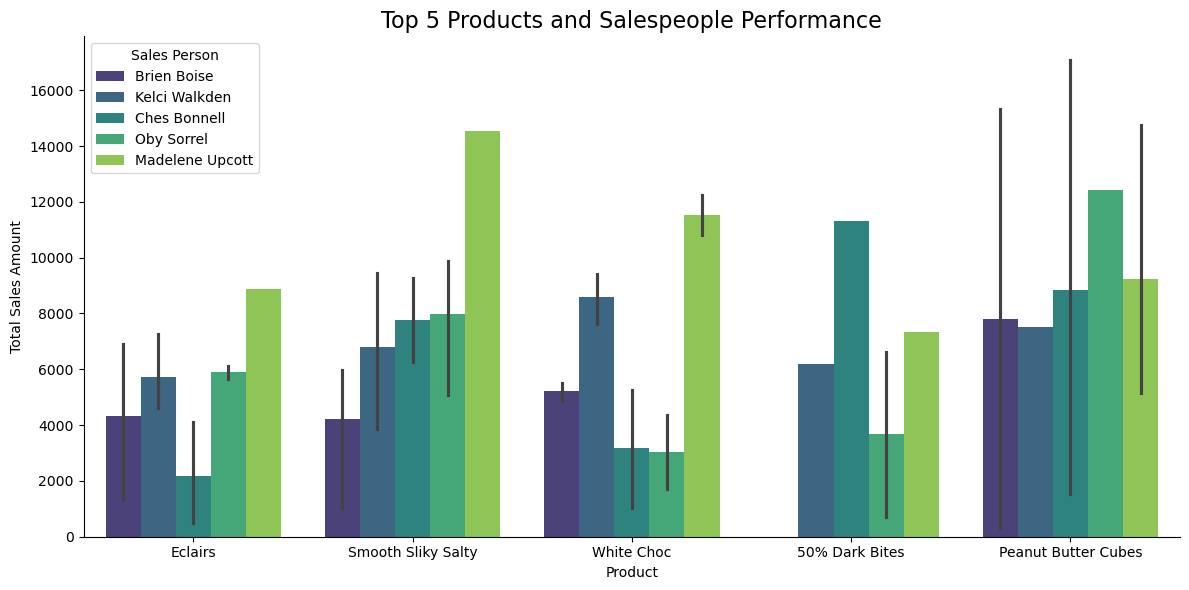

In [ ]:
top_5_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5).index
top_5_salespeople = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(5).index
top_5_df = df[df['Product'].isin(top_5_products) & df['Sales Person'].isin(top_5_salespeople)]

sns.catplot(data=top_5_df, x='Product', y='Amount', hue='Sales Person', kind='bar', height=6, aspect=2, palette='viridis', legend=True, legend_out=False)

plt.title('Top 5 Products and Salespeople Performance', fontsize=16) 
plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
plt.tight_layout() 
plt.show()

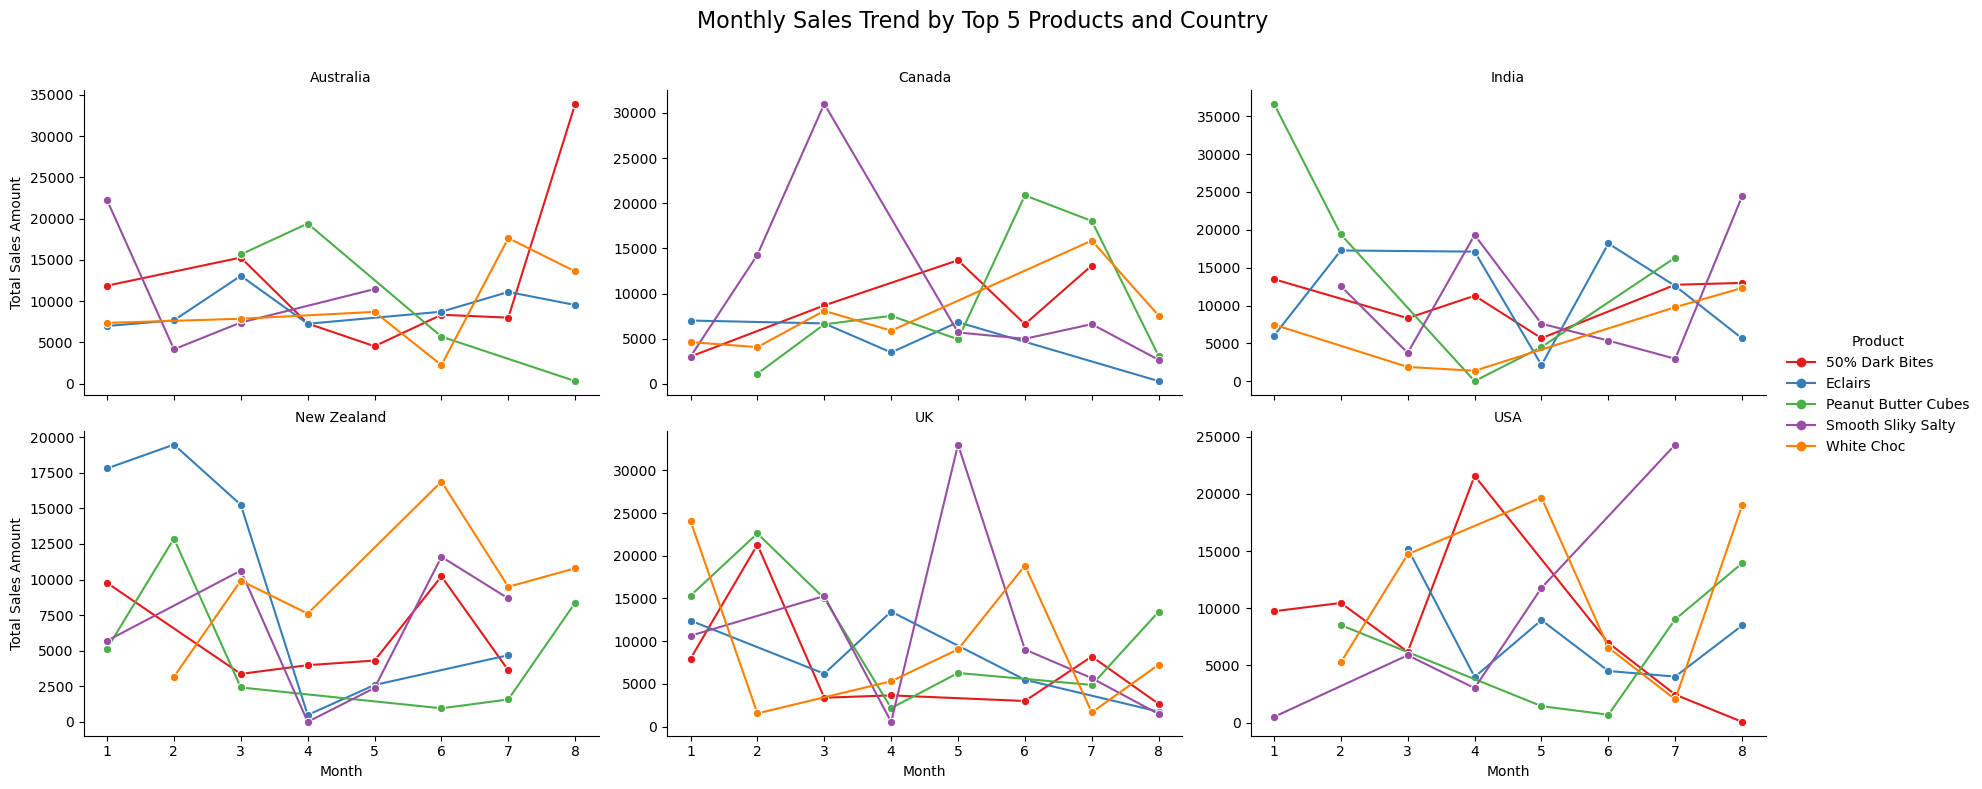

In [112]:
top_5_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5).index
df_top_products = df[df['Product'].isin(top_5_products)]
monthly_sales = df_top_products.groupby(['Month', 'Product', 'Country'])['Amount'].sum().reset_index()

g = sns.relplot(data=monthly_sales,x='Month',y='Amount',kind='line',hue='Product',col='Country',
                col_wrap=3,marker='o',facet_kws={'sharey': False},palette='Set1',height=4,aspect=1.5)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Total Sales Amount")
g.fig.suptitle("Monthly Sales Trend by Top 5 Products and Country", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

- **Australia: 50% Dark Bities is top performing**
- **Candada: Smooth Sliky Salty is top performing**
- **India

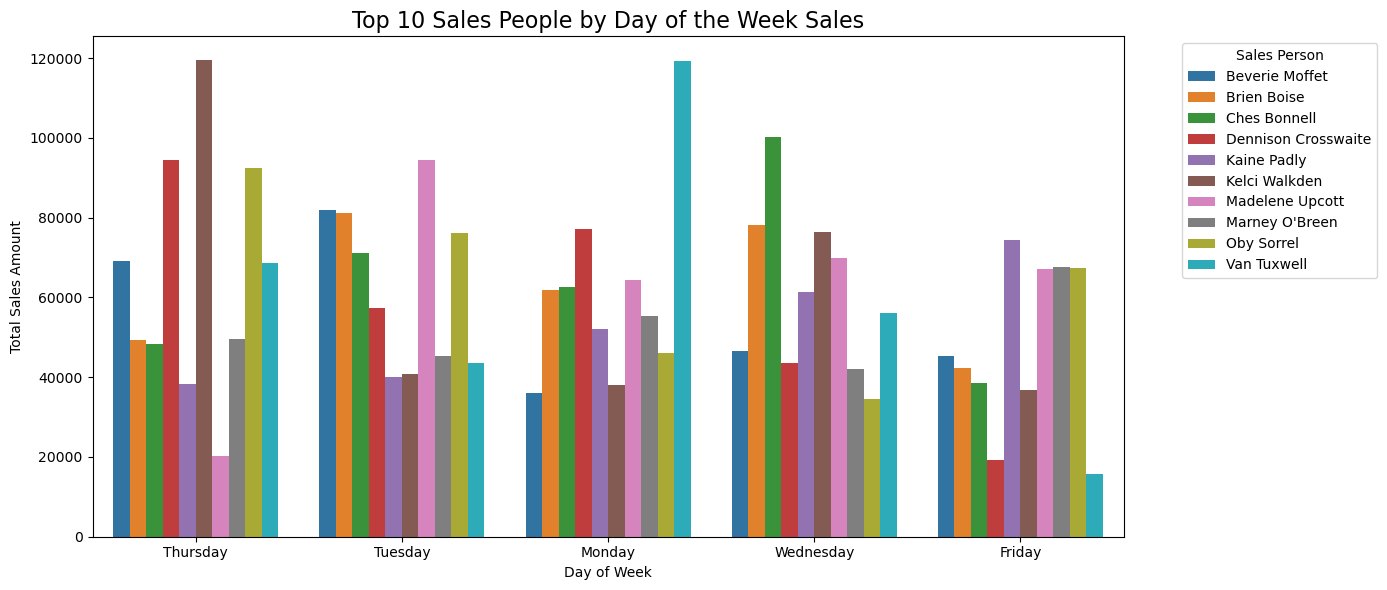

In [120]:
top_10_salespeople = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10).index
df_top10 = df[df['Sales Person'].isin(top_10_salespeople)]
day_sales_top10 = df_top10.groupby(['Day_Name', 'Sales Person'])['Amount'].sum().reset_index()

day_order = (day_sales_top10.groupby('Day_Name')['Amount'].sum().sort_values(ascending=False).index.tolist())

plt.figure(figsize=(14, 6))
sns.barplot(data=day_sales_top10,x='Day_Name',y='Amount',hue='Sales Person',order=day_order,palette='tab10')

plt.title('Top 10 Sales People by Day of the Week Sales', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales Amount')
plt.legend(title='Sales Person', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()